In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bits = 1000
sample = 1000000
radius = 451
scanner_type = sdmlib.SDM_SCANNER_THREAD

In [3]:
address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

In [4]:
sdm.write_random_bitstrings(10000)

In [5]:
b = sdmlib.Bitstring.init_random(1000)
sdm.write(b, b)

In [13]:
from IPython.display import clear_output
def run(prefix=''):
    distances = []
    x = range(0, 1001)
    for i, dist in enumerate(x):
        clear_output(wait=True)
        print '{}Distance: {:4d} ({:.2f}%)'.format(prefix, dist, 100.*(i+1)/len(x))
        c = sdmlib.Bitstring.init_from_bitstring(b)
        c.flip_random_bits(dist)
        assert c.distance_to(b) == dist
        d = sdm.read(c)
        distances.append(d.distance_to(b))
    print 'Done!'
    return distances

In [7]:
distances = []
killed = 0
start = 900000
end = 1000000
step = 10000

In [8]:
distances.append((killed, run()))

Distance: 1000 (100.00%)
Done!


In [10]:
import random
order = range(1000000)
random.shuffle(order)

In [11]:
while killed < start:
    sdm.reset_hardlocation(order[killed])
    killed += 1

In [12]:
print killed

900000


In [14]:
while killed < end:
    cur = killed
    while killed < cur + step:
        sdm.reset_hardlocation(order[killed])
        killed += 1
    distances.append((killed, run('[{}] '.format(killed))))

[1000000] Distance: 1000 (100.00%)
Done!


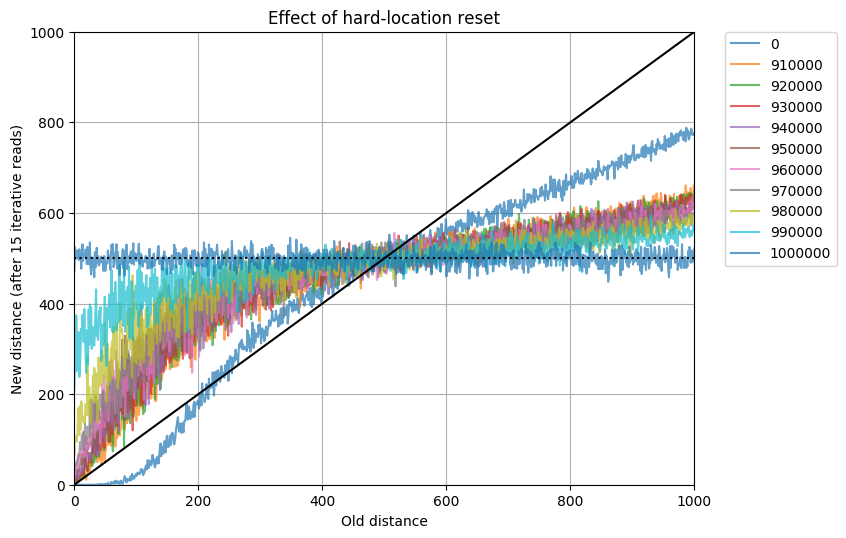

In [17]:
x = range(0, 1001)
plt.figure(figsize=(8, 6), dpi=100)
for killed, dist in [distances[0]] + distances[1:]:
    plt.plot(x, dist, label=str(killed), alpha=0.7)
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Effect of hard-location reset')
plt.ylabel('New distance (after 15 iterative reads)')
plt.xlabel('Old distance')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 1000, 0, 1000]);